In [2]:
import pandas as pd
storm = pd.read_csv('../data/NOAA_StormEvents/StormEvents_2014_2024.csv')

In [3]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Increase display width
pd.set_option('display.max_colwidth', 30)   # Limit column width for readability

In [4]:
storm.head(20)

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,201402,18,1000,201402,18,2000,83473,503953,NEW HAMPSHIRE,33,2014,February,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,18-FEB-14 10:00:00,EST-5,18-FEB-14 20:00:00,0,0,0,0,0.00K,0.00K,Trained Spotter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low pressure developing so...,Eight to twelve inches of ...,CSV
1,201403,30,831,201403,30,931,83971,507163,MASSACHUSETTS,25,2014,March,Flood,C,17,MIDDLESEX,BOX,30-MAR-14 08:31:00,EST-5,30-MAR-14 09:31:00,0,0,0,0,35.00K,0.00K,Amateur Radio,NaN,NaN,Heavy Rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,WNW,CHELMSFORD CENTER,1.0,WNW,CHELMSFORD CENTER,42.5861,-71.3472,42.5867,-71.3469,A stacked low pressure sys...,Boston Road was closed nea...,CSV
2,201404,27,2306,201404,27,2306,83517,506236,MISSOURI,29,2014,April,Hail,C,67,DOUGLAS,SGF,27-APR-14 23:06:00,CST-6,27-APR-14 23:06:00,0,0,0,0,0.00K,0.00K,Trained Spotter,0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,AVA,1.0,W,AVA,36.9500,-92.6600,36.9500,-92.6600,A powerful storm system an...,NaN,CSV
3,201404,27,2303,201404,27,2303,83517,506237,MISSOURI,29,2014,April,Thunderstorm Wind,C,67,DOUGLAS,SGF,27-APR-14 23:03:00,CST-6,27-APR-14 23:03:00,0,0,0,0,10.00K,0.00K,Emergency Manager,61.00,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,W,AVA,1.0,W,AVA,36.9500,-92.6600,36.9500,-92.6600,A powerful storm system an...,Several power poles snappe...,CSV
4,201402,15,1300,201402,15,2100,83132,501499,WASHINGTON,53,2014,February,High Wind,Z,20,SOUTHWEST INTERIOR,PQR,15-FEB-14 13:00:00,PST-8,15-FEB-14 21:00:00,0,0,0,0,0.00K,0.00K,Official NWS Observations,75.00,EG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong cold front produc...,Two stations measured stro...,CSV
5,201402,16,1600,201402,17,150,83203,501980,OREGON,41,2014,February,High Wind,Z,1,NORTHERN OREGON COAST,PQR,16-FEB-14 16:00:00,PST-8,17-FEB-14 01:50:00,0,0,0,0,0.00K,0.00K,Official NWS Observations,57.00,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong cold front with a...,The weather station at Gar...,CSV
6,201402,17,100,201402,17,520,83203,501981,OREGON,41,2014,February,High Wind,Z,2,CENTRAL OREGON COAST,PQR,17-FEB-14 01:00:00,PST-8,17-FEB-14 05:20:00,0,0,0,0,0.00K,0.00K,Official NWS Observations,54.00,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong cold front with a...,Lincoln City (AR659) and t...,CSV
7,201402,16,1800,201402,17,500,83203,501982,OREGON,41,2014,February,High Wind,Z,3,COAST RANGE OF NW OREGON,PQR,16-FEB-14 18:00:00,PST-8,17-FEB-14 05:00:00,0,0,0,0,0.00K,0.00K,Official NWS Observations,55.00,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A strong cold front with a...,Two stations in the Northw...,CSV
8,201403,16,1400,201403,17,1200,83806,507869,VIRGINIA,51,2014,March,Winter Storm,Z,24,ROCKBRIDGE,RNK,16-MAR-14 14:00:00,EST-5,17-MAR-14 12:00:00,0,0,0,0,0.00K,0.00K,Trained Spotter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low pressure ejecting out ...,Various sources reported s...,CSV
9,201403,13,0,201403,13,1100,84127,507867,VIRGINIA,51,2014,March,Winter Weather,Z,7,TAZEWELL,RNK,13-MAR-14 00:00:00,EST-5,13-MAR-14 11:00:00,0,0,0,0,0.00K,0.00K,Newspaper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest winds behind a d...,Several 

In [5]:
storm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691434 entries, 0 to 691433
Data columns (total 51 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BEGIN_YEARMONTH     691434 non-null  int64  
 1   BEGIN_DAY           691434 non-null  int64  
 2   BEGIN_TIME          691434 non-null  int64  
 3   END_YEARMONTH       691434 non-null  int64  
 4   END_DAY             691434 non-null  int64  
 5   END_TIME            691434 non-null  int64  
 6   EPISODE_ID          691434 non-null  int64  
 7   EVENT_ID            691434 non-null  int64  
 8   STATE               691434 non-null  object 
 9   STATE_FIPS          691434 non-null  int64  
 10  YEAR                691434 non-null  int64  
 11  MONTH_NAME          691434 non-null  object 
 12  EVENT_TYPE          691434 non-null  object 
 13  CZ_TYPE             691434 non-null  object 
 14  CZ_FIPS             691434 non-null  int64  
 15  CZ_NAME             691434 non-nul

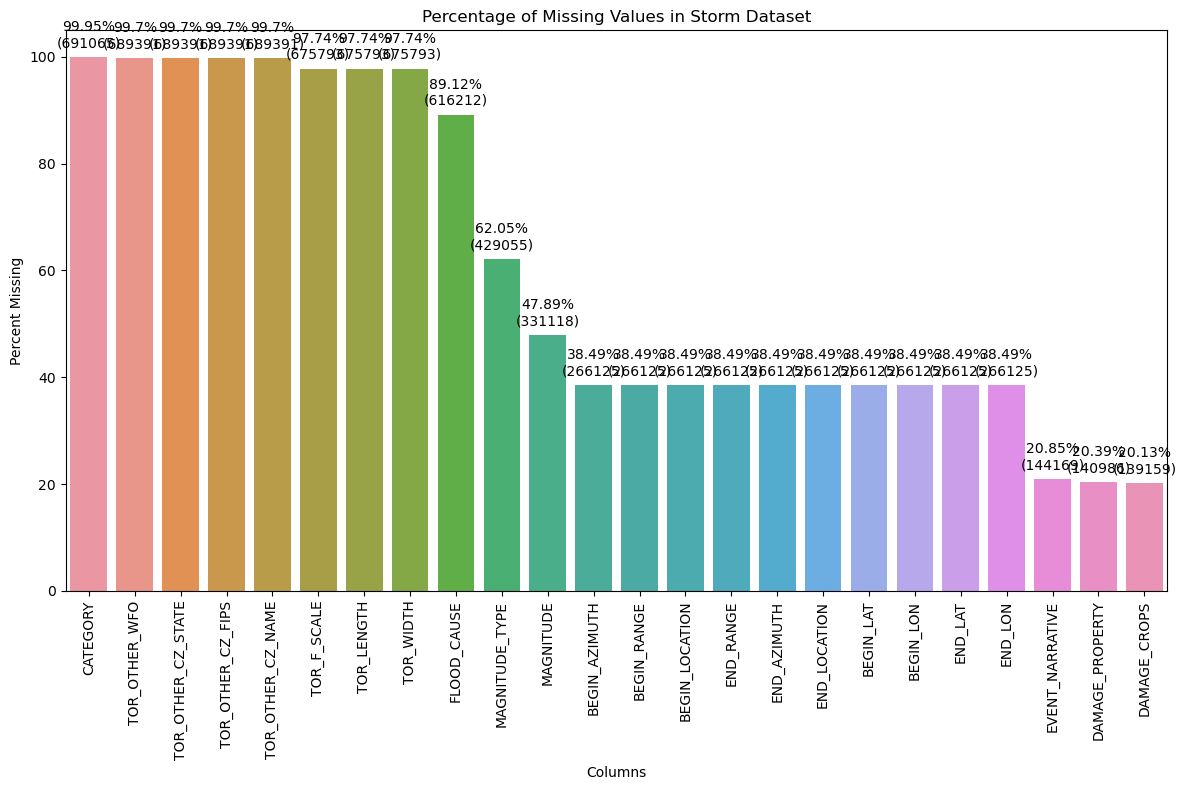

In [6]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Calculate missing values
missing_values = storm.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(storm) * 100).round(2)

# Create a DataFrame for visualization
missing_df = pd.DataFrame({'Count': missing_values, 'Percent': missing_percent})
missing_df = missing_df[missing_df['Count'] > 0]  # Only show columns with missing values

# Plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=missing_df.index, y='Percent', data=missing_df)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percent Missing')
plt.title('Percentage of Missing Values in Storm Dataset')

# Add value labels on top of each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f"{missing_df['Percent'].iloc[i]}%\n({missing_df['Count'].iloc[i]})", 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom',
                xytext = (0, 5), textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [7]:
storm['DAMAGE_PROPERTY'], storm['DAMAGE_CROPS']

(0          0.00K
 1         35.00K
 2          0.00K
 3         10.00K
 4          0.00K
            ...  
 691429       NaN
 691430     0.00K
 691431     0.00K
 691432     0.00K
 691433     0.00K
 Name: DAMAGE_PROPERTY, Length: 691434, dtype: object,
 0         0.00K
 1         0.00K
 2         0.00K
 3         0.00K
 4         0.00K
           ...  
 691429      NaN
 691430    0.00K
 691431    0.00K
 691432    0.00K
 691433    0.00K
 Name: DAMAGE_CROPS, Length: 691434, dtype: object)

In [8]:
def convert_damage_to_number(value):
    if pd.isna(value):
        return 0
    
    value = str(value).strip()
    
    if value == '0' or value == '0.00K' or value == '0.0':
        return 0
    
    multiplier = 1
    if value.endswith('K'):
        multiplier = 1000
        value = value[:-1]
    elif value.endswith('M'):
        multiplier = 1000000
        value = value[:-1]
    elif value.endswith('B'):
        multiplier = 1000000000
        value = value[:-1]
        
    try:
        return float(value) * multiplier
    except ValueError:
        return 0

# Convert the columns in place
storm['DAMAGE_PROPERTY'] = storm['DAMAGE_PROPERTY'].apply(convert_damage_to_number)
storm['DAMAGE_CROPS'] = storm['DAMAGE_CROPS'].apply(convert_damage_to_number)

# Display the first few rows of the converted columns
print(storm[['DAMAGE_PROPERTY', 'DAMAGE_CROPS']].head(10))

# Summary statistics of the numeric damage columns
print("\nSummary statistics for damage columns:")
print(storm[['DAMAGE_PROPERTY', 'DAMAGE_CROPS']].describe())

   DAMAGE_PROPERTY  DAMAGE_CROPS
0              0.0           0.0
1          35000.0           0.0
2              0.0           0.0
3          10000.0           0.0
4              0.0           0.0
5              0.0           0.0
6              0.0           0.0
7              0.0           0.0
8              0.0           0.0
9              0.0           0.0

Summary statistics for damage columns:
       DAMAGE_PROPERTY  DAMAGE_CROPS
count     6.914340e+05  6.914340e+05
mean      3.596199e+05  2.494144e+04
std       3.602821e+07  2.470467e+06
min       0.000000e+00  0.000000e+00
25%       0.000000e+00  0.000000e+00
50%       0.000000e+00  0.000000e+00
75%       0.000000e+00  0.000000e+00
max       1.700000e+10  1.500000e+09


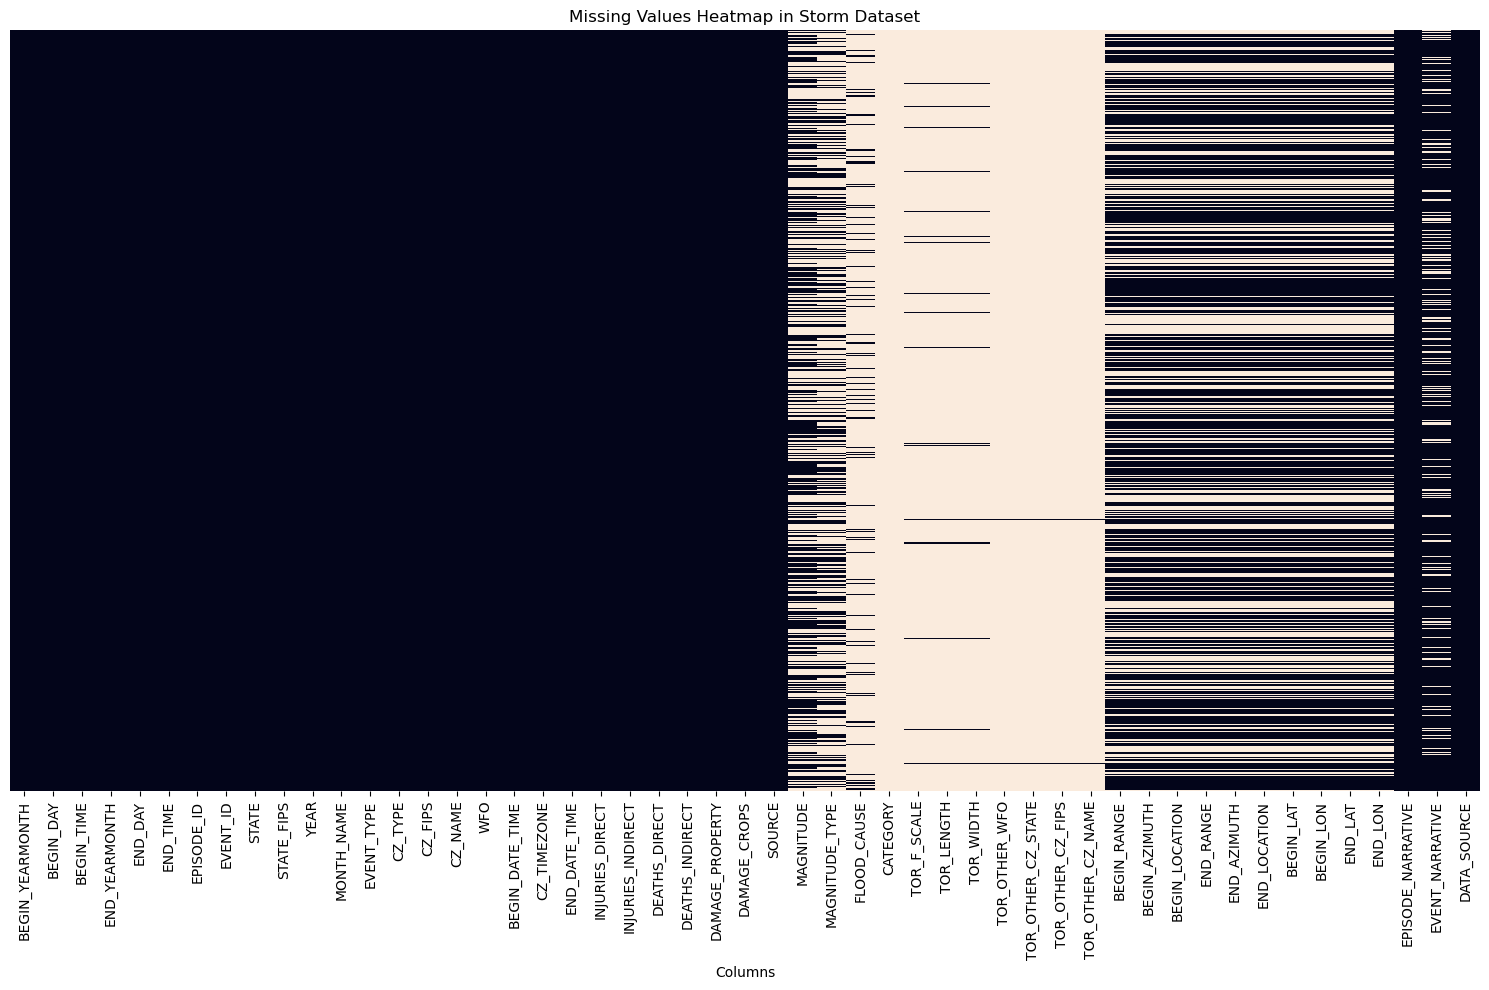

In [9]:
plt.figure(figsize=(15, 10))
sns.heatmap(storm.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap in Storm Dataset')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
storm['MAGNITUDE_TYPE'].value_counts()

MAGNITUDE_TYPE
EG    175976
MG     81371
MS      4633
ES       399
Name: count, dtype: int64

- EG (Energy Magnitude): A measure of the total seismic energy released by an earthquake.
- MG (Moment Magnitude): The most commonly used modern magnitude scale, replacing the older Richter scale.
- MS (Surface Wave Magnitude): Measures the amplitude of surface waves, historically used for larger earthquakes.
- ES (Seismic Energy): A measure related to the energy released by the earthquake, possibly using a different calculation method.

OR

- EG = Wind Estimated Gust;
- ES = Estimated Sustained Wind;
- MS = Measured Sustained Wind;
- MG = Measured Wind Gust


In [11]:
# Drop columns with high null values
columns_to_drop = [
    'FLOOD_CAUSE', 'CATEGORY', 'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 
    'TOR_OTHER_WFO', 'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME',
    'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
    'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT', 'END_LON', 'EVENT_NARRATIVE'
]

# Drop the columns
storm = storm.drop(columns=columns_to_drop)

# Display the shape after dropping columns
print(f"Dataset shape after dropping columns: {storm.shape}")

# Display the first few rows to confirm
storm.head(2)

Dataset shape after dropping columns: (691434, 31)


,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,EPISODE_NARRATIVE,DATA_SOURCE
0,201402,18,1000,201402,18,2000,83473,503953,NEW HAMPSHIRE,33,2014,February,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,18-FEB-14 10:00:00,EST-5,18-FEB-14 20:00:00,0,0,0,0,0.0,0.0,Trained Spotter,NaN,NaN,Low pressure developing so...,CSV
1,201403,30,831,201403,30,931,83971,507163,MASSACHUSETTS,25,2014,March,Flood,C,17,MIDDLESEX,BOX,30-MAR-14 08:31:00,EST-5,30-MAR-14 09:31:00,0,0,0,0,35000.0,0.0,Amateur Radio,NaN,NaN,A stacked low pressure sys...,CSV


In [12]:
# Create datetime columns from the year, month, day, and time components
storm['start_datetime'] = pd.to_datetime(
    storm['BEGIN_YEARMONTH'].astype(str) + 
    storm['BEGIN_DAY'].astype(str).str.zfill(2) + 
    storm['BEGIN_TIME'].astype(str).str.zfill(4),
    format='%Y%m%d%H%M'
)

storm['end_datetime'] = pd.to_datetime(
    storm['END_YEARMONTH'].astype(str) + 
    storm['END_DAY'].astype(str).str.zfill(2) + 
    storm['END_TIME'].astype(str).str.zfill(4),
    format='%Y%m%d%H%M'
)

# Add a duration column in hours
storm['duration_hours'] = (storm['end_datetime'] - storm['start_datetime']).dt.total_seconds() / 3600

# Display the new columns
print(storm[['start_datetime', 'end_datetime', 'duration_hours']].head())

       start_datetime        end_datetime  duration_hours
0 2014-02-18 10:00:00 2014-02-18 20:00:00            10.0
1 2014-03-30 08:31:00 2014-03-30 09:31:00             1.0
2 2014-04-27 23:06:00 2014-04-27 23:06:00             0.0
3 2014-04-27 23:03:00 2014-04-27 23:03:00             0.0
4 2014-02-15 13:00:00 2014-02-15 21:00:00             8.0


In [13]:
# Reorganize columns: move temporal columns to front and drop redundant columns
columns_to_drop_additional = ['BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 
                             'END_YEARMONTH', 'END_DAY', 'END_TIME', 
                             'BEGIN_DATE_TIME', 'END_DATE_TIME', 
                             'EPISODE_ID', 'EVENT_ID', 'DATA_SOURCE']

# Create a list of columns in the desired order
temporal_columns = ['start_datetime', 'end_datetime', 'duration_hours']
remaining_columns = [col for col in storm.columns 
                    if col not in temporal_columns + columns_to_drop_additional]
new_column_order = temporal_columns + remaining_columns

# Drop redundant columns and reorder
storm = storm.drop(columns=columns_to_drop_additional)[new_column_order]

# Display the first few rows of the reorganized dataframe
print(f"Dataset shape after reorganization: {storm.shape}")
storm.head(20)

Dataset shape after reorganization: (691434, 23)


,start_datetime,end_datetime,duration_hours,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,EPISODE_NARRATIVE
0,2014-02-18 10:00:00,2014-02-18 20:00:00,10.000000,NEW HAMPSHIRE,33,2014,February,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,EST-5,0,0,0,0,0.0,0.0,Trained Spotter,NaN,NaN,Low pressure developing so...
1,2014-03-30 08:31:00,2014-03-30 09:31:00,1.000000,MASSACHUSETTS,25,2014,March,Flood,C,17,MIDDLESEX,BOX,EST-5,0,0,0,0,35000.0,0.0,Amateur Radio,NaN,NaN,A stacked low pressure sys...
2,2014-04-27 23:06:00,2014-04-27 23:06:00,0.000000,MISSOURI,29,2014,April,Hail,C,67,DOUGLAS,SGF,CST-6,0,0,0,0,0.0,0.0,Trained Spotter,0.88,NaN,A powerful storm system an...
3,2014-04-27 23:03:00,2014-04-27 23:03:00,0.000000,MISSOURI,29,2014,April,Thunderstorm Wind,C,67,DOUGLAS,SGF,CST-6,0,0,0,0,10000.0,0.0,Emergency Manager,61.00,EG,A powerful storm system an...
4,2014-02-15 13:00:00,2014-02-15 21:00:00,8.000000,WASHINGTON,53,2014,February,High Wind,Z,20,SOUTHWEST INTERIOR,PQR,PST-8,0,0,0,0,0.0,0.0,Official NWS Observations,75.00,EG,A strong cold front produc...
5,2014-02-16 16:00:00,2014-02-17 01:50:00,9.833333,OREGON,41,2014,February,High Wind,Z,1,NORTHERN OREGON COAST,PQR,PST-8,0,0,0,0,0.0,0.0,Official NWS Observations,57.00,MG,A strong cold front with a...
6,2014-02-17 01:00:00,2014-02-17 05:20:00,4.333333,OREGON,41,2014,February,High Wind,Z,2,CENTRAL OREGON COAST,PQR,PST-8,0,0,0,0,0.0,0.0,Official NWS Observations,54.00,MG,A strong cold front with a...
7,2014-02-16 18:00:00,2014-02-17 05:00:00,11.000000,OREGON,41,2014,February,High Wind,Z,3,COAST RANGE OF NW OREGON,PQR,PST-8,0,0,0,0,0.0,0.0,Official NWS Observations,55.00,MG,A strong cold front with a...
8,2014-03-16 14:00:00,2014-03-17 12:00:00,22.000000,VIRGINIA,51,2014,March,Winter Storm,Z,24,ROCKBRIDGE,RNK,EST-5,0,0,0,0,0.0,0.0,Trained Spotter,NaN,NaN,Low pressure ejecting out ...
9,2014-03-13 00:00:00,2014-03-13 11:00:00,11.000000,VIRGINIA,51,2014,March,Winter Weather,Z,7,TAZEWELL,RNK,EST-5,0,0,0,0,0.0,0.0,Newspaper,NaN,NaN,Northwest winds behind a d...


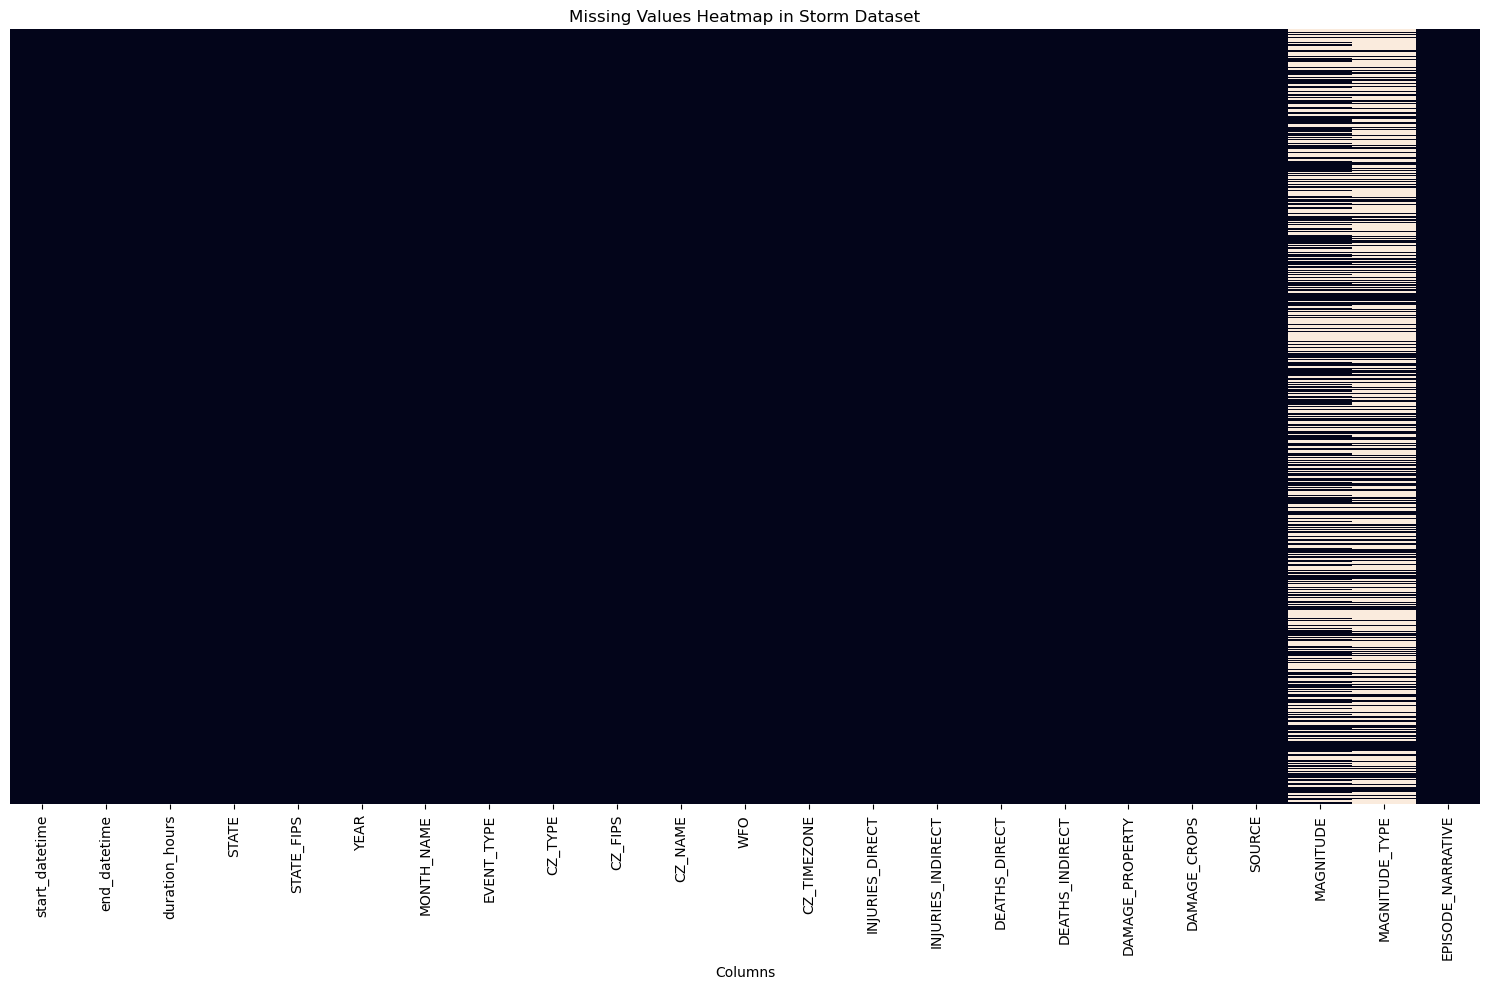

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(storm.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap in Storm Dataset')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
storm['CZ_TIMEZONE'].value_counts()

CZ_TIMEZONE
CST-6     316821
EST-5     239137
MST-7      86243
PST-8      36630
HST-10      6695
AST-4       2648
AKST-9      2521
PDT-7        256
GST10        234
SST-11       195
EDT-4         36
CDT-5         18
Name: count, dtype: int64

In [16]:
# Convert start_datetime and end_datetime to Eastern Time
def convert_to_eastern(dt, timezone_str):
    if pd.isna(dt) or pd.isna(timezone_str):
        return dt
    
    # Define timezone offsets in hours relative to Eastern Time (EST-5)
    timezone_offsets = {
        'EST-5': 0,     # Eastern Time (no offset)
        'CST-6': -1,    # Central Time (1 hour behind Eastern)
        'MST-7': -2,    # Mountain Time (2 hours behind Eastern)
        'PST-8': -3,    # Pacific Time (3 hours behind Eastern)
        'HST-10': -5,   # Hawaii Time (5 hours behind Eastern)
        'AST-4': 1,     # Atlantic Time (1 hour ahead of Eastern)
        'AKST-9': -4,   # Alaska Time (4 hours behind Eastern)
        'PDT-7': -2,    # Pacific Daylight Time (2 hours behind Eastern)
        'GST10': 15,    # Guam Standard Time (15 hours ahead of Eastern)
        'SST-11': -6,   # Samoa Standard Time (6 hours behind Eastern)
        'EDT-4': 1,     # Eastern Daylight Time (1 hour ahead of standard Eastern)
        'CDT-5': 0      # Central Daylight Time (same as Eastern Standard)
    }
    
    # Apply the offset
    offset_hours = timezone_offsets.get(timezone_str, 0)
    return dt + pd.Timedelta(hours=offset_hours)

# Apply the conversion to both datetime columns
storm['start_datetime_eastern'] = storm.apply(
    lambda row: convert_to_eastern(row['start_datetime'], row['CZ_TIMEZONE']), 
    axis=1
)

storm['end_datetime_eastern'] = storm.apply(
    lambda row: convert_to_eastern(row['end_datetime'], row['CZ_TIMEZONE']), 
    axis=1
)

# Recalculate duration in hours with the new eastern times
storm['duration_hours_eastern'] = (storm['end_datetime_eastern'] - storm['start_datetime_eastern']).dt.total_seconds() / 3600

# Show the first few rows with the original and converted times
print(storm[['start_datetime', 'end_datetime', 'CZ_TIMEZONE', 
             'start_datetime_eastern', 'end_datetime_eastern', 'duration_hours_eastern']].head(10))

       start_datetime        end_datetime CZ_TIMEZONE start_datetime_eastern end_datetime_eastern  duration_hours_eastern
0 2014-02-18 10:00:00 2014-02-18 20:00:00       EST-5    2014-02-18 10:00:00  2014-02-18 20:00:00               10.000000
1 2014-03-30 08:31:00 2014-03-30 09:31:00       EST-5    2014-03-30 08:31:00  2014-03-30 09:31:00                1.000000
2 2014-04-27 23:06:00 2014-04-27 23:06:00       CST-6    2014-04-27 22:06:00  2014-04-27 22:06:00                0.000000
3 2014-04-27 23:03:00 2014-04-27 23:03:00       CST-6    2014-04-27 22:03:00  2014-04-27 22:03:00                0.000000
4 2014-02-15 13:00:00 2014-02-15 21:00:00       PST-8    2014-02-15 10:00:00  2014-02-15 18:00:00                8.000000
5 2014-02-16 16:00:00 2014-02-17 01:50:00       PST-8    2014-02-16 13:00:00  2014-02-16 22:50:00                9.833333
6 2014-02-17 01:00:00 2014-02-17 05:20:00       PST-8    2014-02-16 22:00:00  2014-02-17 02:20:00                4.333333
7 2014-02-16 18:00:00 20

In [17]:
# Reorganize columns to place eastern time columns after original datetime columns
desired_order = [
    'start_datetime', 'end_datetime', 
    'start_datetime_eastern', 'end_datetime_eastern'
]

# Add remaining columns (excluding duration_hours_eastern)
remaining_cols = [col for col in storm.columns 
                 if col not in desired_order and col != 'duration_hours_eastern']
new_order = desired_order + remaining_cols

# Reorganize the DataFrame with the new column order
storm = storm[new_order]

# Display the first few rows to verify the new structure
print(f"New dataframe shape: {storm.shape}")
storm.head(3)

New dataframe shape: (691434, 25)


,start_datetime,end_datetime,start_datetime_eastern,end_datetime_eastern,duration_hours,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,EPISODE_NARRATIVE
0,2014-02-18 10:00:00,2014-02-18 20:00:00,2014-02-18 10:00:00,2014-02-18 20:00:00,10.0,NEW HAMPSHIRE,33,2014,February,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,EST-5,0,0,0,0,0.0,0.0,Trained Spotter,NaN,NaN,Low pressure developing so...
1,2014-03-30 08:31:00,2014-03-30 09:31:00,2014-03-30 08:31:00,2014-03-30 09:31:00,1.0,MASSACHUSETTS,25,2014,March,Flood,C,17,MIDDLESEX,BOX,EST-5,0,0,0,0,35000.0,0.0,Amateur Radio,NaN,NaN,A stacked low pressure sys...
2,2014-04-27 23:06:00,2014-04-27 23:06:00,2014-04-27 22:06:00,2014-04-27 22:06:00,0.0,MISSOURI,29,2014,April,Hail,C,67,DOUGLAS,SGF,CST-6,0,0,0,0,0.0,0.0,Trained Spotter,0.88,NaN,A powerful storm system an...


In [18]:
# Drop YEAR and MONTH_NAME columns as they can be derived from datetime columns
storm = storm.drop(columns=['YEAR', 'MONTH_NAME'])

# Display the dataframe shape after dropping columns
print(f"Dataset shape after dropping YEAR and MONTH_NAME: {storm.shape}")

# Add month and year columns derived from start_datetime if needed
storm['year'] = storm['start_datetime'].dt.year
storm['month'] = storm['start_datetime'].dt.month_name()

# Preview the results
storm[['start_datetime', 'year', 'month']].head()

Dataset shape after dropping YEAR and MONTH_NAME: (691434, 23)


,start_datetime,year,month
0,2014-02-18 10:00:00,2014,February
1,2014-03-30 08:31:00,2014,March
2,2014-04-27 23:06:00,2014,April
3,2014-04-27 23:03:00,2014,April
4,2014-02-15 13:00:00,2014,February


In [19]:
storm = storm.drop(columns=['year', 'month'])
storm.head(2)

,start_datetime,end_datetime,start_datetime_eastern,end_datetime_eastern,duration_hours,STATE,STATE_FIPS,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,EPISODE_NARRATIVE
0,2014-02-18 10:00:00,2014-02-18 20:00:00,2014-02-18 10:00:00,2014-02-18 20:00:00,10.0,NEW HAMPSHIRE,33,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,EST-5,0,0,0,0,0.0,0.0,Trained Spotter,NaN,NaN,Low pressure developing so...
1,2014-03-30 08:31:00,2014-03-30 09:31:00,2014-03-30 08:31:00,2014-03-30 09:31:00,1.0,MASSACHUSETTS,25,Flood,C,17,MIDDLESEX,BOX,EST-5,0,0,0,0,35000.0,0.0,Amateur Radio,NaN,NaN,A stacked low pressure sys...


In [20]:
storm.head(20)

,start_datetime,end_datetime,start_datetime_eastern,end_datetime_eastern,duration_hours,STATE,STATE_FIPS,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,EPISODE_NARRATIVE
0,2014-02-18 10:00:00,2014-02-18 20:00:00,2014-02-18 10:00:00,2014-02-18 20:00:00,10.000000,NEW HAMPSHIRE,33,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,EST-5,0,0,0,0,0.0,0.0,Trained Spotter,NaN,NaN,Low pressure developing so...
1,2014-03-30 08:31:00,2014-03-30 09:31:00,2014-03-30 08:31:00,2014-03-30 09:31:00,1.000000,MASSACHUSETTS,25,Flood,C,17,MIDDLESEX,BOX,EST-5,0,0,0,0,35000.0,0.0,Amateur Radio,NaN,NaN,A stacked low pressure sys...
2,2014-04-27 23:06:00,2014-04-27 23:06:00,2014-04-27 22:06:00,2014-04-27 22:06:00,0.000000,MISSOURI,29,Hail,C,67,DOUGLAS,SGF,CST-6,0,0,0,0,0.0,0.0,Trained Spotter,0.88,NaN,A powerful storm system an...
3,2014-04-27 23:03:00,2014-04-27 23:03:00,2014-04-27 22:03:00,2014-04-27 22:03:00,0.000000,MISSOURI,29,Thunderstorm Wind,C,67,DOUGLAS,SGF,CST-6,0,0,0,0,10000.0,0.0,Emergency Manager,61.00,EG,A powerful storm system an...
4,2014-02-15 13:00:00,2014-02-15 21:00:00,2014-02-15 10:00:00,2014-02-15 18:00:00,8.000000,WASHINGTON,53,High Wind,Z,20,SOUTHWEST INTERIOR,PQR,PST-8,0,0,0,0,0.0,0.0,Official NWS Observations,75.00,EG,A strong cold front produc...
5,2014-02-16 16:00:00,2014-02-17 01:50:00,2014-02-16 13:00:00,2014-02-16 22:50:00,9.833333,OREGON,41,High Wind,Z,1,NORTHERN OREGON COAST,PQR,PST-8,0,0,0,0,0.0,0.0,Official NWS Observations,57.00,MG,A strong cold front with a...
6,2014-02-17 01:00:00,2014-02-17 05:20:00,2014-02-16 22:00:00,2014-02-17 02:20:00,4.333333,OREGON,41,High Wind,Z,2,CENTRAL OREGON COAST,PQR,PST-8,0,0,0,0,0.0,0.0,Official NWS Observations,54.00,MG,A strong cold front with a...
7,2014-02-16 18:00:00,2014-02-17 05:00:00,2014-02-16 15:00:00,2014-02-17 02:00:00,11.000000,OREGON,41,High Wind,Z,3,COAST RANGE OF NW OREGON,PQR,PST-8,0,0,0,0,0.0,0.0,Official NWS Observations,55.00,MG,A strong cold front with a...
8,2014-03-16 14:00:00,2014-03-17 12:00:00,2014-03-16 14:00:00,2014-03-17 12:00:00,22.000000,VIRGINIA,51,Winter Storm,Z,24,ROCKBRIDGE,RNK,EST-5,0,0,0,0,0.0,0.0,Trained Spotter,NaN,NaN,Low pressure ejecting out ...
9,2014-03-13 00:00:00,2014-03-13 11:00:00,2014-03-13 00:00:00,2014-03-13 11:00:00,11.000000,VIRGINIA,51,Winter Weather,Z,7,TAZEWELL,RNK,EST-5,0,0,0,0,0.0,0.0,Newspaper,NaN,NaN,Northwest winds behind a d...


In [21]:
storm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691434 entries, 0 to 691433
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   start_datetime          691434 non-null  datetime64[ns]
 1   end_datetime            691434 non-null  datetime64[ns]
 2   start_datetime_eastern  691434 non-null  datetime64[ns]
 3   end_datetime_eastern    691434 non-null  datetime64[ns]
 4   duration_hours          691434 non-null  float64       
 5   STATE                   691434 non-null  object        
 6   STATE_FIPS              691434 non-null  int64         
 7   EVENT_TYPE              691434 non-null  object        
 8   CZ_TYPE                 691434 non-null  object        
 9   CZ_FIPS                 691434 non-null  int64         
 10  CZ_NAME                 691434 non-null  object        
 11  WFO                     691434 non-null  object        
 12  CZ_TIMEZONE             691434

impute MAGNITUDE and MAGNITUDE_TYPE values appropriately. they are of high importance so impute them using predictive modelling or something else robust. add another column which has imputed values and do not replace the current one.


In [24]:
# First, let's analyze the relationship between EVENT_TYPE and MAGNITUDE/MAGNITUDE_TYPE
event_magnitude_analysis = storm.groupby('EVENT_TYPE')[['MAGNITUDE', 'MAGNITUDE_TYPE']].agg(
    {'MAGNITUDE': ['mean', 'median', 'count'], 'MAGNITUDE_TYPE': lambda x: x.value_counts().index[0] if len(x.value_counts()) > 0 else None}
).reset_index()

# Flatten the multi-index columns
event_magnitude_analysis.columns = ['EVENT_TYPE', 'MAGNITUDE_MEAN', 'MAGNITUDE_MEDIAN', 'MAGNITUDE_COUNT', 'MOST_COMMON_TYPE']

# Display the analysis
print("Analysis of MAGNITUDE and MAGNITUDE_TYPE by EVENT_TYPE:")
print(event_magnitude_analysis.sort_values('MAGNITUDE_COUNT', ascending=False).head(10))

# Create imputation model for MAGNITUDE using other relevant features
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Select features for imputation model
features = ['EVENT_TYPE', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 'INJURIES_DIRECT', 
            'DEATHS_DIRECT', 'duration_hours', 'STATE', 'CZ_TYPE']

# Create label encoders for all data first (to include all categories)
label_encoders = {}
for col in ['EVENT_TYPE', 'STATE', 'CZ_TYPE']:
    le = LabelEncoder()
    le.fit(storm[col])  # Fit on ALL data, not just the non-null magnitude data
    label_encoders[col] = le

# Prepare dataset for training (only rows with MAGNITUDE)
magnitude_data = storm.dropna(subset=['MAGNITUDE'])[features + ['MAGNITUDE']].copy()

# Encode categorical variables using pre-fit encoders
for col in ['EVENT_TYPE', 'STATE', 'CZ_TYPE']:
    magnitude_data[col] = label_encoders[col].transform(magnitude_data[col])

# Train the model
X = magnitude_data[features]
y = magnitude_data['MAGNITUDE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Evaluate the model
score = rf_model.score(X_test, y_test)
print(f"\nR² score for MAGNITUDE prediction: {score:.4f}")

# Create a copy of storm dataframe for imputation
storm_imputed = storm.copy()

# Prepare data for prediction
missing_magnitude = storm[storm['MAGNITUDE'].isna()].copy()
for col in ['EVENT_TYPE', 'STATE', 'CZ_TYPE']:
    missing_magnitude[col] = label_encoders[col].transform(missing_magnitude[col])

# Make predictions for missing values
missing_magnitude_pred = rf_model.predict(missing_magnitude[features])

# Add imputed values to a new column
storm_imputed.loc[storm['MAGNITUDE'].isna(), 'MAGNITUDE_IMPUTED'] = missing_magnitude_pred
storm_imputed.loc[~storm['MAGNITUDE'].isna(), 'MAGNITUDE_IMPUTED'] = storm_imputed.loc[~storm['MAGNITUDE'].isna(), 'MAGNITUDE']

# Now for MAGNITUDE_TYPE - create a model to predict the type
from sklearn.ensemble import RandomForestClassifier

# Filter data with both MAGNITUDE and MAGNITUDE_TYPE
type_data = storm.dropna(subset=['MAGNITUDE', 'MAGNITUDE_TYPE']).copy()

# Encode the target - fit on all available magnitude types first
le_type = LabelEncoder()
le_type.fit(storm['MAGNITUDE_TYPE'].dropna())
type_data['MAGNITUDE_TYPE_encoded'] = le_type.transform(type_data['MAGNITUDE_TYPE'])

# Features for type prediction (including MAGNITUDE)
type_features = features + ['MAGNITUDE']
X_type = type_data[type_features]
y_type = type_data['MAGNITUDE_TYPE_encoded']

# Encode categorical features again
for col in ['EVENT_TYPE', 'STATE', 'CZ_TYPE']:
    X_type[col] = label_encoders[col].transform(X_type[col])

# Split and train
X_type_train, X_type_test, y_type_train, y_type_test = train_test_split(X_type, y_type, test_size=0.2, random_state=42)

rf_type_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_type_model.fit(X_type_train, y_type_train)

# Evaluate
type_score = rf_type_model.score(X_type_test, y_type_test)
print(f"Accuracy for MAGNITUDE_TYPE prediction: {type_score:.4f}")

# Prepare data for prediction (using both original and imputed MAGNITUDE)
missing_type = storm[storm['MAGNITUDE_TYPE'].isna()].copy()

# Add the imputed magnitude to use for prediction
missing_type_with_magnitude = missing_type.copy()

# For rows that have original MAGNITUDE, use it; for others, use the imputed value
for col in ['EVENT_TYPE', 'STATE', 'CZ_TYPE']:
    missing_type_with_magnitude[col] = label_encoders[col].transform(missing_type_with_magnitude[col])

# Use MAGNITUDE if available, otherwise use the imputed values
missing_type_with_magnitude['MAGNITUDE'] = missing_type_with_magnitude['MAGNITUDE'].fillna(
    storm_imputed.loc[missing_type_with_magnitude.index, 'MAGNITUDE_IMPUTED'])

# Make predictions
missing_type_pred = rf_type_model.predict(missing_type_with_magnitude[type_features])

# Add predictions to dataframe
storm_imputed['MAGNITUDE_TYPE_IMPUTED'] = storm['MAGNITUDE_TYPE']
storm_imputed.loc[storm['MAGNITUDE_TYPE'].isna(), 'MAGNITUDE_TYPE_IMPUTED'] = le_type.inverse_transform(missing_type_pred)

# Show results
print("\nImputation results:")
print(f"Original data: {storm['MAGNITUDE'].count()} MAGNITUDE values and {storm['MAGNITUDE_TYPE'].count()} MAGNITUDE_TYPE values")
print(f"After imputation: {storm_imputed['MAGNITUDE_IMPUTED'].count()} MAGNITUDE_IMPUTED values and {storm_imputed['MAGNITUDE_TYPE_IMPUTED'].count()} MAGNITUDE_TYPE_IMPUTED values")

# Show sample of imputed values
print("\nSample of imputed values:")
sample_imputed = storm_imputed[storm['MAGNITUDE'].isna()].sample(5)[
    ['EVENT_TYPE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'MAGNITUDE_IMPUTED', 'MAGNITUDE_TYPE_IMPUTED']
]
print(sample_imputed)

Analysis of MAGNITUDE and MAGNITUDE_TYPE by EVENT_TYPE:
                  EVENT_TYPE  MAGNITUDE_MEAN  MAGNITUDE_MEDIAN  MAGNITUDE_COUNT MOST_COMMON_TYPE
45         Thunderstorm Wind       53.742403              52.0           186450               EG
18                      Hail        1.250240               1.0            97652             None
23                 High Wind       53.868993              53.0            38746               MG
36  Marine Thunderstorm Wind       39.681075              38.0            25147               MG
44               Strong Wind       40.367383              40.0            11356               EG
32          Marine High Wind       53.425249              52.0              602               MG
31               Marine Hail        1.089754               1.0              285             None
35        Marine Strong Wind       34.743590              37.0               78               MG
0      Astronomical Low Tide             NaN               NaN         

C:\Users\Dell\AppData\Local\Temp\ipykernel_4384\1878461134.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_type[col] = label_encoders[col].transform(X_type[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_4384\1878461134.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_type[col] = label_encoders[col].transform(X_type[col])
C:\Users\Dell\AppData\Local\Temp\ipykernel_4384\1878461134.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Accuracy for MAGNITUDE_TYPE prediction: 0.9260

Imputation results:
Original data: 360316 MAGNITUDE values and 262379 MAGNITUDE_TYPE values
After imputation: 691434 MAGNITUDE_IMPUTED values and 691434 MAGNITUDE_TYPE_IMPUTED values

Sample of imputed values:
           EVENT_TYPE  MAGNITUDE MAGNITUDE_TYPE  MAGNITUDE_IMPUTED MAGNITUDE_TYPE_IMPUTED
35514   Coastal Flood        NaN            NaN           1.759542                     MS
597208        Drought        NaN            NaN           1.128250                     MS
239644    Flash Flood        NaN            NaN           1.200183                     MS
486783        Drought        NaN            NaN           1.206300                     MS
16275      Heavy Snow        NaN            NaN          50.355000                     EG


In [27]:
# Extract the imputed columns from storm_imputed
imputed_cols = ['MAGNITUDE_IMPUTED', 'MAGNITUDE_TYPE_IMPUTED']

# Check if these columns already exist in storm dataset
# If they don't exist, add them
if 'MAGNITUDE_IMPUTED' not in storm.columns:
    storm['MAGNITUDE_IMPUTED'] = storm_imputed['MAGNITUDE_IMPUTED']
    print("Added MAGNITUDE_IMPUTED column")
    
if 'MAGNITUDE_TYPE_IMPUTED' not in storm.columns:
    storm['MAGNITUDE_TYPE_IMPUTED'] = storm_imputed['MAGNITUDE_TYPE_IMPUTED']
    print("Added MAGNITUDE_TYPE_IMPUTED column")

Added MAGNITUDE_IMPUTED column
Added MAGNITUDE_TYPE_IMPUTED column


In [30]:
storm.head(5)

,start_datetime,end_datetime,start_datetime_eastern,end_datetime_eastern,duration_hours,STATE,STATE_FIPS,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,CZ_TIMEZONE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,EPISODE_NARRATIVE,MAGNITUDE_IMPUTED,MAGNITUDE_TYPE_IMPUTED
0,2014-02-18 10:00:00,2014-02-18 20:00:00,2014-02-18 10:00:00,2014-02-18 20:00:00,10.0,NEW HAMPSHIRE,33,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,EST-5,0,0,0,0,0.0,0.0,Trained Spotter,NaN,NaN,Low pressure developing so...,51.534744,EG
1,2014-03-30 08:31:00,2014-03-30 09:31:00,2014-03-30 08:31:00,2014-03-30 09:31:00,1.0,MASSACHUSETTS,25,Flood,C,17,MIDDLESEX,BOX,EST-5,0,0,0,0,35000.0,0.0,Amateur Radio,NaN,NaN,A stacked low pressure sys...,2.397500,EG
2,2014-04-27 23:06:00,2014-04-27 23:06:00,2014-04-27 22:06:00,2014-04-27 22:06:00,0.0,MISSOURI,29,Hail,C,67,DOUGLAS,SGF,CST-6,0,0,0,0,0.0,0.0,Trained Spotter,0.88,NaN,A powerful storm system an...,0.880000,EG
3,2014-04-27 23:03:00,2014-04-27 23:03:00,2014-04-27 22:03:00,2014-04-27 22:03:00,0.0,MISSOURI,29,Thunderstorm Wind,C,67,DOUGLAS,SGF,CST-6,0,0,0,0,10000.0,0.0,Emergency Manager,61.00,EG,A powerful storm system an...,61.000000,EG
4,2014-02-15 13:00:00,2014-02-15 21:00:00,2014-02-15 10:00:00,2014-02-15 18:00:00,8.0,WASHINGTON,53,High Wind,Z,20,SOUTHWEST INTERIOR,PQR,PST-8,0,0,0,0,0.0,0.0,Official NWS Observations,75.00,EG,A strong cold front produc...,75.000000,EG


In [31]:
# Export the storm dataset as a parquet file
# Parquet is a columnar storage format that's efficient for analytics
# It compresses data and preserves schema information

# Check if storm dataframe is available and properly loaded
if 'storm' in globals() and isinstance(storm, pd.DataFrame):
    # Define the output filename
    output_file = 'storm_all_features.parquet'
    
    # Export to parquet format
    storm.to_parquet(output_file, index=False)
    
    # Get file size for verification
    import os
    file_size = os.path.getsize(output_file) / (1024 * 1024)
    
    print(f"Dataset exported successfully to {output_file}")
    print(f"File size: {file_size:.2f} MB")
    print(f"Number of rows: {storm.shape[0]}")
    print(f"Number of columns: {storm.shape[1]}")
else:
    print("Error: 'storm' dataframe not found or not properly loaded")

Dataset exported successfully to storm_all_features.parquet
File size: 107.43 MB
Number of rows: 691434
Number of columns: 25


In [34]:
# Drop specified columns from the storm dataset
columns_to_drop = ['start_datetime', 'end_datetime', 'CZ_TIMEZONE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'EPISODE_NARRATIVE']
storm = storm.drop(columns=columns_to_drop)

# Display the shape after dropping columns
print(f"Dataset shape after dropping specified columns: {storm.shape}")

# Display the first few rows to confirm
storm.head(20)

Dataset shape after dropping specified columns: (691434, 19)


,start_datetime_eastern,end_datetime_eastern,duration_hours,STATE,STATE_FIPS,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE_IMPUTED,MAGNITUDE_TYPE_IMPUTED
0,2014-02-18 10:00:00,2014-02-18 20:00:00,10.000000,NEW HAMPSHIRE,33,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,0,0,0,0,0.0,0.0,Trained Spotter,51.534744,EG
1,2014-03-30 08:31:00,2014-03-30 09:31:00,1.000000,MASSACHUSETTS,25,Flood,C,17,MIDDLESEX,BOX,0,0,0,0,35000.0,0.0,Amateur Radio,2.397500,EG
2,2014-04-27 22:06:00,2014-04-27 22:06:00,0.000000,MISSOURI,29,Hail,C,67,DOUGLAS,SGF,0,0,0,0,0.0,0.0,Trained Spotter,0.880000,EG
3,2014-04-27 22:03:00,2014-04-27 22:03:00,0.000000,MISSOURI,29,Thunderstorm Wind,C,67,DOUGLAS,SGF,0,0,0,0,10000.0,0.0,Emergency Manager,61.000000,EG
4,2014-02-15 10:00:00,2014-02-15 18:00:00,8.000000,WASHINGTON,53,High Wind,Z,20,SOUTHWEST INTERIOR,PQR,0,0,0,0,0.0,0.0,Official NWS Observations,75.000000,EG
5,2014-02-16 13:00:00,2014-02-16 22:50:00,9.833333,OREGON,41,High Wind,Z,1,NORTHERN OREGON COAST,PQR,0,0,0,0,0.0,0.0,Official NWS Observations,57.000000,MG
6,2014-02-16 22:00:00,2014-02-17 02:20:00,4.333333,OREGON,41,High Wind,Z,2,CENTRAL OREGON COAST,PQR,0,0,0,0,0.0,0.0,Official NWS Observations,54.000000,MG
7,2014-02-16 15:00:00,2014-02-17 02:00:00,11.000000,OREGON,41,High Wind,Z,3,COAST RANGE OF NW OREGON,PQR,0,0,0,0,0.0,0.0,Official NWS Observations,55.000000,MG
8,2014-03-16 14:00:00,2014-03-17 12:00:00,22.000000,VIRGINIA,51,Winter Storm,Z,24,ROCKBRIDGE,RNK,0,0,0,0,0.0,0.0,Trained Spotter,47.632250,MG
9,2014-03-13 00:00:00,2014-03-13 11:00:00,11.000000,VIRGINIA,51,Winter Weather,Z,7,TAZEWELL,RNK,0,0,0,0,0.0,0.0,Newspaper,46.454336,MG


In [35]:
storm.head(2)

,start_datetime_eastern,end_datetime_eastern,duration_hours,STATE,STATE_FIPS,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE_IMPUTED,MAGNITUDE_TYPE_IMPUTED
0,2014-02-18 10:00:00,2014-02-18 20:00:00,10.0,NEW HAMPSHIRE,33,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,0,0,0,0,0.0,0.0,Trained Spotter,51.534744,EG
1,2014-03-30 08:31:00,2014-03-30 09:31:00,1.0,MASSACHUSETTS,25,Flood,C,17,MIDDLESEX,BOX,0,0,0,0,35000.0,0.0,Amateur Radio,2.397500,EG


In [36]:
# Check if storm dataframe is available and properly loaded
if 'storm' in globals() and isinstance(storm, pd.DataFrame):
    # Define the output filename
    output_file_selected = 'storm_feature_selected.parquet'
    
    # Export to parquet format
    storm.to_parquet(output_file_selected, index=False)
    
    # Get file size for verification
    import os
    file_size_selected = os.path.getsize(output_file_selected) / (1024 * 1024)
    
    print(f"Dataset exported successfully to {output_file_selected}")
    print(f"File size: {file_size_selected:.2f} MB")
    print(f"Number of rows: {storm.shape[0]}")
    print(f"Number of columns: {storm.shape[1]}")
else:
    print("Error: 'storm' dataframe not found or not properly loaded")

Dataset exported successfully to storm_feature_selected.parquet
File size: 14.17 MB
Number of rows: 691434
Number of columns: 19


In [37]:
ss = pd.read_parquet('./storm_feature_selected.parquet')
ss.head(2)

,start_datetime_eastern,end_datetime_eastern,duration_hours,STATE,STATE_FIPS,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE_IMPUTED,MAGNITUDE_TYPE_IMPUTED
0,2014-02-18 10:00:00,2014-02-18 20:00:00,10.0,NEW HAMPSHIRE,33,Heavy Snow,Z,12,EASTERN HILLSBOROUGH,BOX,0,0,0,0,0.0,0.0,Trained Spotter,51.534744,EG
1,2014-03-30 08:31:00,2014-03-30 09:31:00,1.0,MASSACHUSETTS,25,Flood,C,17,MIDDLESEX,BOX,0,0,0,0,35000.0,0.0,Amateur Radio,2.397500,EG


In [38]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691434 entries, 0 to 691433
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   start_datetime_eastern  691434 non-null  datetime64[ns]
 1   end_datetime_eastern    691434 non-null  datetime64[ns]
 2   duration_hours          691434 non-null  float64       
 3   STATE                   691434 non-null  object        
 4   STATE_FIPS              691434 non-null  int64         
 5   EVENT_TYPE              691434 non-null  object        
 6   CZ_TYPE                 691434 non-null  object        
 7   CZ_FIPS                 691434 non-null  int64         
 8   CZ_NAME                 691434 non-null  object        
 9   WFO                     691434 non-null  object        
 10  INJURIES_DIRECT         691434 non-null  int64         
 11  INJURIES_INDIRECT       691434 non-null  int64         
 12  DEATHS_DIRECT           691434

In [ ]:
import dask.dataframe as dd

eaglei = dd.read_csv('../data/cleaned_data2.csv')
eaglei.head(20)

,Year,county,state,customers,run_date,run_time
0,2014,Coosa,Alabama,12.0,2014-11-01,04:00:00
1,2014,Elmore,Alabama,7.0,2014-11-01,04:00:00
2,2014,Pike,Alabama,1.0,2014-11-01,04:00:00
3,2014,Talladega,Alabama,31.0,2014-11-01,04:00:00
4,2014,Navajo,Arizona,1.0,2014-11-01,04:00:00
5,2014,Boone,Arkansas,3.0,2014-11-01,04:00:00
6,2014,Pulaski,Arkansas,1.0,2014-11-01,04:00:00
7,2014,Kern,California,30.0,2014-11-01,04:00:00
8,2014,Los Angeles,California,1555.0,2014-11-01,04:00:00
9,2014,Riverside,California,2.0,2014-11-01,04:00:00


TO DO:

- DO NOT DROP FEATURE FOR SOME TYPE OF STORMS WHICH CANT BE ACTUALLY FILLED

- MERGE DATASET BY WINDOW

- DO IT RECENT 3 YEAR WISE

- DO NLP FEATURE

- DIFFERENT MODELS FOR DIFFERENT EVENTS

-
